{'Aday':         Date type variable  value
0  1/01/2022    A      day   10.0
4  2/01/2022    A      day   20.0
8  3/01/2022    A      day    5.0, 'Anight':          Date type variable  value
12  1/01/2022    A    night    5.0
16  2/01/2022    A    night   10.0
20  3/01/2022    A    night   10.0, 'Bday':         Date type variable  value
1  1/01/2022    B      day   25.0
5  2/01/2022    B      day   30.0
9  3/01/2022    B      day   15.0, 'Bnight':          Date type variable  value
13  1/01/2022    B    night   10.0
17  2/01/2022    B    night    0.0
21  3/01/2022    B    night   15.0, 'Cday':          Date type variable  value
2   1/01/2022    C      day   15.0
6   2/01/2022    C      day   10.0
10  3/01/2022    C      day    5.0, 'Cnight':          Date type variable  value
14  1/01/2022    C    night   10.0
18  2/01/2022    C    night   10.0
22  3/01/2022    C    night    5.0, 'Dday':          Date type variable  value
3   1/01/2022    D      day    5.0
7   2/01/2022    D      day  

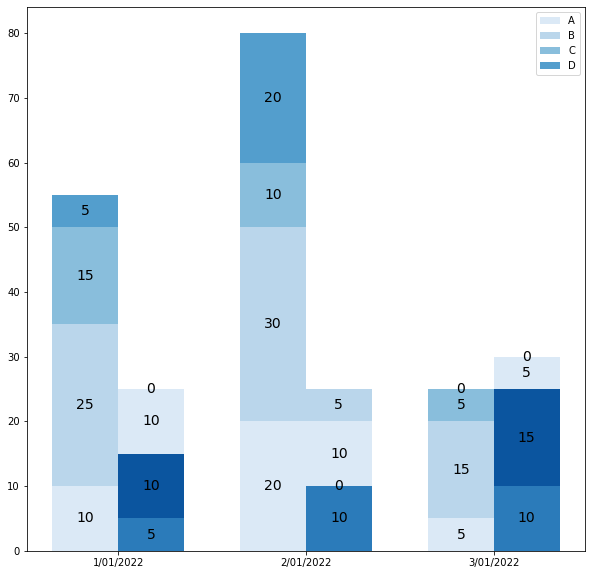

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline



test = pd.read_csv('wt.csv')
test = test.fillna(0)

def convertdate(dstring):
    return datetime.datetime.strptime(dstring, '%d/%m/%Y')

for row in test['Date']:
    convertdate(row)
    
# Long form
test1 = pd.melt(test, id_vars = ['Date', 'type'], value_vars=['day', 'night'])

# Plotting
sns.set_palette("Blues")

labels = test1['Date'].drop_duplicates()  # getting dates for x-axis labels
x0 = np.arange(len(labels))  # needed for spacing

# converting dataframe to dictionary
test1.to_dict()


# create the data groups with a dict comprehension and groupby
data = {''.join(k): v for k, v in test1.groupby(['type', 'variable'])}
print(data)
# build the plots
variable = test1.variable.unique()
stacks = len(variable)  # how many stacks in each group for a tick location
types = test1.type.unique()

# set the width
w = 0.35

# this needs to be adjusted based on the number of stacks; each location needs to be split into the proper number of locations
x1 = [x0 - w/stacks, x0 + w/stacks]

fig, ax = plt.subplots(figsize = (10,10))
for x, var in zip(x1, variable):
    bottom = 0
    for typ in types:
        height = data[f'{typ}{var}'].value.to_numpy()
        b = ax.bar(x = x, height = height, width = w, bottom = bottom)
        ax.bar_label(b, label_type='center', fontsize = 14)
        bottom += height

ax.set_xticks(x0)
ax.legend(['A','B', 'C', 'D'])
_ = ax.set_xticklabels(labels)